In [9]:
import sys, os, glob
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

## Data downloaded from NCEI

https://www.ncei.noaa.gov/data/oceans/archive/arc0216/0253808/4.4/data/0-data/


Data have been downloaded and saved in Google Drive https://drive.google.com/drive/folders/1e2tRj7WXnycS_EXVbo9pGR6I-o2-V0NL?usp=sharing

In [61]:
idir = '/Users/doan/MyDrive/share/2024/clim_class_data/' # google drive data (shared)
files = sorted(glob.glob(idir + '0253808/4.4/data/0-data/Region-*-WMO-Normals-9120/*/CSV/*.csv'))
print(len(files))
odir0 = idir

6682


In [ ]:
!open 0253808/4.4/data/0-data/Region-2-WMO-Normals-9120/Japan/CSV/Fukuoka_47807.csv

In [63]:
ss = []
for iff, f in enumerate(files[:]):
    co, _, afile = f.split('/')[-3:]
    reg = f.split('/')[-4][:8]
    try:
        ll = open(f, encoding='latin-1').readlines()
    except:
        print('wrong in reading file', iff, f)
        continue
    

    i1 = [i for i, l in enumerate(ll) if l.split(',')[0].strip() == 'Parameter_Code']
    i2 = i1[1:] + [len(ll)]

    dd = {}
    
    try:
        ila = [i for i, l in enumerate(ll) if l.split(',')[0].strip() == 'WMO_Number' and l.split(',')[1].strip() == 'Latitude' ][0]
        snu, la, lo, alt = ll[ila+1].split(',')[:4]
        ss.append( [ co, afile[:-10], snu, la, lo, alt ])
        
        for j1, j2  in zip(i1, i2):

            var = ll[j1+1].split(',')[1].strip()


            kk = [k for k, l2 in enumerate(ll[j1:j2]) if l2.split(',')[0].strip() == 'WMO_Number']
            ll2 = ll[kk[0] + j1 : j2 ] 
            ll3 = [l3.split(',') for l3 in ll2 if l3.split(',')[0].strip() != '']

            d1 = pd.DataFrame(ll3)

            d2 = d1.T
            d3 = d2.set_index(0).T
            #d3.loc[:,'Calculation_Name'] = d3.loc[:,'Calculation_Name'].str.strip().values
            
            d4 = d3.set_index(  [c  for c in d3.columns[0:4] ] ) .T
            d5 = d4[:12]
            dd[var] =  d5# exclude annual

        if 1:
            do = pd.concat(dd, axis=1)
            do.index.name = ''
            #do = do.loc[:, (slice(None), snu)].droplevel(level=[1,2,4], axis=1)
            for ic in range(do.shape[1]):
                do.iloc[:,ic] = pd.to_numeric(do.iloc[:,ic],errors = 'coerce')
            odir = odir0+'/data/'+reg+'/'+co+'/'
            if not os.path.exists(odir): os.makedirs(odir)
            ofile = odir + afile
            do.to_csv(ofile)
            

    except:
        print('wrong in processing', iff, f)
    
    
ds = pd.DataFrame(ss, columns=['country', 'place', 'station_id', 'latitude', 'longitude', 'altitude'])
ds.to_csv('list_of_stations.csv', index=None)

wrong in processing 312 /Users/doan/MyDrive/share/2024/clim_class_data/0253808/4.4/data/0-data/Region-1-WMO-Normals-9120/Rwanda/CSV/KAMEMBE_AERO_64380.csv
wrong in processing 445 /Users/doan/MyDrive/share/2024/clim_class_data/0253808/4.4/data/0-data/Region-1-WMO-Normals-9120/Zambia/CSV/Chipata_67581.csv
wrong in processing 2952 /Users/doan/MyDrive/share/2024/clim_class_data/0253808/4.4/data/0-data/Region-4-WMO-Normals-9120/Mexico/CSV/CiudadGuizman_76656.csv
wrong in processing 4118 /Users/doan/MyDrive/share/2024/clim_class_data/0253808/4.4/data/0-data/Region-6-WMO-Normals-9120/BosniaAndHerzegovinaRepublicOfSrpska/CSV/Banjaluka_14542.csv
wrong in processing 4132 /Users/doan/MyDrive/share/2024/clim_class_data/0253808/4.4/data/0-data/Region-6-WMO-Normals-9120/Bulgaria/CSV/Lovech_15525.csv
wrong in processing 5716 /Users/doan/MyDrive/share/2024/clim_class_data/0253808/4.4/data/0-data/Region-6-WMO-Normals-9120/Slovakia/CSV/BOLKOVCE_11927.csv
wrong in processing 5717 /Users/doan/MyDrive/shar

In [22]:
ds

,country,place,station_id,latitude,longitude,altitude
0,Algeria,Adrar,60620,27|50|14|N,000|11|37|W,279.230000
1,Algeria,AinSefra,60560,32|45|07|N,000|35|38|W,1076.000000
2,Algeria,AlgerDarElBeida,60390,36|41|24|N,003|13|00|E,25.000000
3,Algeria,Annaba,60360,36|49|20|N,007|48|09|E,3.000000
4,Algeria,BBArreridj,60444,36|04|03|N,004|47|40|E,955.000000
...,...,...,...,...,...,...
6676,UnitedKingdom,Weybourne,03488,52|56|58|N,001|07|20|E,21
6677,UnitedKingdom,WickAirport,03075,58|27|13|N,003|05|24|W,36
6678,UnitedKingdom,WightStCatherinesPoint,03866,50|34|32|N,001|17|49|W,20
6679,UnitedKingdom,Wittering,03462,52|36|43|N,000|28|05|W,74


# Extract only temperature and precipitation from available stations

## step 2: extract to data_temp_prcp

In [23]:
ifiles = sorted(glob.glob(idir+'/data/*/*/*.csv'))
print(len(ifiles))

6654


In [24]:
for i, f in enumerate(ifiles[:]):

    try:
        
        df = pd.read_csv(f, index_col=0, header=[0,1,2]) #
        df.columns = df.columns.set_levels(df.columns.levels[0].str.lower(), level=0)
        
        
        df.index = df.index.str.strip()
        df.loc['Calculation_Name'] = df.loc['Calculation_Name'].str.lower().str.strip().values
        
        d3 = []
        vv1 = ['Precipitation_Total',  'Daily_Mean_Temperature'][:]
        vv2 = ['Sum', 'Mean'][:]
        b1 =np.array(vv1)[ ~np.array([ v.lower() in df.columns.get_level_values(0) for v in vv1])]
        
        for v1, v2 in zip( vv1,vv2 ):
            if v1 == 'Precipitation_Total':
                try:
                    d1 = df.loc[:,v1.lower()]
                except:
                    d1 = df.loc[:,v1.lower()+'1']
            else:
                d1 = df.loc[:,v1.lower()]
            d2 = d1.loc[:, d1.iloc[0].values == v2.lower()]
            d3.append(d2)
            

        do = pd.concat( d3, axis=1).droplevel(level=[1],axis=1)[2:]
        do.columns = ['Precipitation', 'Temperature']

        ofile = f.replace('data', 'data_temp_prcp')
        if not do.isnull().any().any():
            odir = os.path.dirname(f).replace('data', 'data_temp_prcp')
            if not os.path.exists(odir): os.makedirs(odir)
            do.to_csv(ofile)
        else:
            null=1
        
    except:
        wrong=1


## step 3: extract latitude and longitude information for available stations

In [25]:
files_2 = sorted(glob.glob('data_temp_prcp/*/*/*.csv'))
print('number of stations: ', len(files_2))
ds = pd.read_csv('list_of_stations.csv', index_col=[0,1,2])

number of stations:  4463


In [26]:
dss = []
for i, f in enumerate(files_2[:]):
    
    c0, c1,c2, c3 = f.split('/')[1], f.split('/')[2], f.split('/')[3][:-10], f.split('/')[3][-9:-4] 
    
    d = ds.loc[ (c1, c2) ]

    
    xx = []
    for cla in [ 'latitude', 'longitude'][:]:
        try:
            a0 = d[cla].values[0].replace('"', '')
            if '|' in a0: 
                la = a0.split('|')
                a1 = float(la[0])
                for ia, a2 in enumerate(la[1:-1]): 
                    if a2.strip() == '': a2 = '0'
                    a22 =  float(a2) / 60 / 10**ia
                    a1 = a1 + a22
                a3 = la[-1].strip()[-1]

            else: 
                # Egypt
                la = a0.split(' ')
                a1 = float(la[0])
                for ia, a2 in enumerate(la[1:]): 
                    if a2.strip() == '': a2 = '0'
                    a22 =  float(a2) / 60 / 10**ia
                    a1 = a1 + a22
                
                if cla == 'longitude': a3 = 'E'
                if cla == 'latitude': a3 = 'N'
                
                
            if a3 not in ['E', 'W', 'S', 'N']:
                print('    ', cla, c1, c2, la, a1, a3)
                continue
                
            xx.append(c0); xx.append(c1); xx.append(c2)
            xx.append(a1); xx.append(a3); xx.append(d['altitude'].values[0])
            
        except:
            
            print('wrong ', cla, c1, c2, la)
    
    dss.append(xx)
    
do = pd.DataFrame(dss)
do = do[~(do.iloc[:,4].astype(str) == 'None')]
do = do[~(do.iloc[:,9].astype(str) == 'None')]
do.loc[do.iloc[:,4].astype(str) == 'S', 3] = - do.loc[do.iloc[:,4].astype(str) == 'S', 3].values
do.loc[do.iloc[:,10].astype(str) == 'W', 9] = - do.loc[do.iloc[:,10].astype(str) == 'W', 9].values
do = do.loc[:,[0,1,2,3,9, 11]]
do.columns = [ 'region', 'country', 'place', 'latitude', 'longitude', 'altitude']
do = do.set_index(['region', 'country', 'place'])
do.to_csv('list_of_stations_2.csv')

/var/folders/y7/r3_l1bxn4sv6mkmyfgpt9n880000gn/T/ipykernel_40400/3160973317.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  d = ds.loc[ (c1, c2) ]


wrong  latitude Sudan Khartoum ['15', '36', 'N', 'N  ']
wrong  longitude SaudiArabia Al-Olaa ['38', '06', '34', 'E', '']


## Plot map with stations

In [48]:
len(dl)

1752

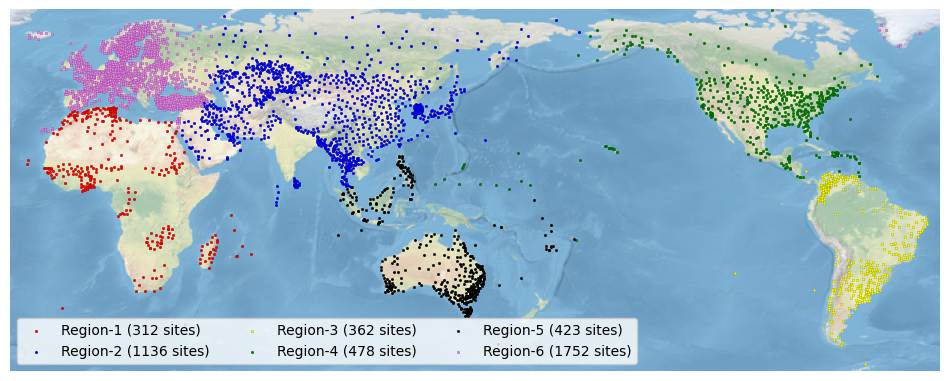

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
df = do
proj = ccrs.PlateCarree(central_longitude=150)
plt.figure(figsize=(12, 8))
ax = plt.axes(projection= proj )
ax.set_extent([-90, 300, -65, 75], crs=ccrs.PlateCarree())
ax.stock_img()
for ig, g in enumerate(list(do.groupby(level=0))):
    dl = g[1] 
    lat, lon = dl['latitude'].values, dl['longitude'].values
    lon = np.where(lon<0, lon+360, lon)
    ax.scatter(lon, lat, s = 4, 
               color = ['r', 'b', 'yellow', 'g', 'k', 'violet'][ig], 
               edgecolor = 'k',
               lw = .1,
               label = dl.index[0][0] + ' ('+str(len(dl))+' sites)',
               transform=ccrs.Geodetic())
plt.legend(ncols = 3, fontsize=10)
plt.axis('off')
plt.savefig('fig/world_stations.png', dpi = 150)